In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas import DataFrame

Определить два вектора, представляющие собой число автомобилей,
припаркованных в течении 5 рабочих дней у бизнес-центра на уличной
стоянке и в подземном гараже.

In [2]:
street = np.array([80,98,75,91,78])
garage = np.array([100,82,105,89,102])
day = np.array(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'])

np.corrcoef(street,garage)

array([[ 1., -1.],
       [-1.,  1.]])

Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).
Коэффициент корреляции практически равен –1, что означает сильную
отрицательную корреляцию.

In [3]:
np.corrcoef(street,garage)[0,1]

-0.9999999999999998

Построить диаграмму рассеяния.

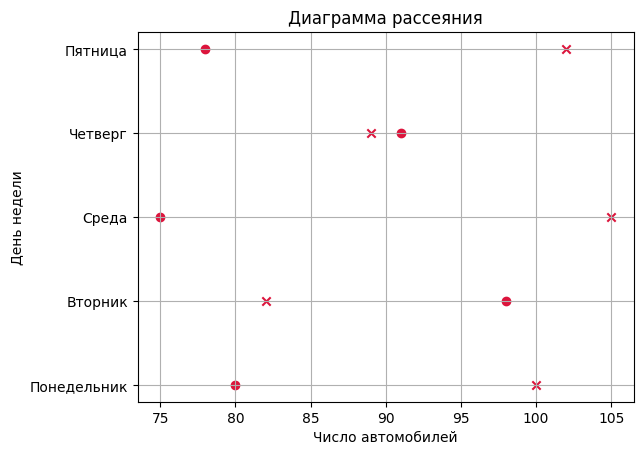

In [4]:
plt.grid(True)
plt.title('Диаграмма рассеяния')
plt.xlabel('Число автомобилей')
plt.ylabel('День недели')
plt.scatter(street, day,  marker = 'o', color = 'crimson')
plt.scatter(garage, day,  marker = 'x', color = 'crimson')

Загрузить bitcoin.csv.

In [5]:
data = pd.read_csv('bitcoin.csv')
data

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...,...
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


Скрыть последние 14 дней.

In [6]:
projection = 14
data['predict'] = data['close'].shift(-projection)
data

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close,predict
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78,430.70
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59,433.32
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03,431.20
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43,430.82
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98,457.05
...,...,...,...,...,...,...,...,...,...
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86,NaN
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38,NaN
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58,NaN
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78,NaN


Произвести нормализацию для нормального среза. 6.	Сделать срез по 14 дням.

In [7]:
x = DataFrame(data,columns=['close'])
y = DataFrame(data, columns=['predict'])
x = np.array(x,type(float))[:-projection]
y = np.array(y,type(float))[:-projection]
y

array([[430.7],
       [433.32],
       [431.2],
       ...,
       [37391.58],
       [36680.78],
       [36843.33]], dtype=object)

Построить линейную регрессию.

In [8]:
regression = LinearRegression()
regression.fit(x,y)

regression.predict(x)

array([[  790.97829972],
       [  786.83465245],
       [  786.28084757],
       ...,
       [39214.45567915],
       [38466.58173965],
       [35640.27806732]])

Вывести угол наклона и y-перехват.

In [9]:
regression.coef_

array([[0.98893729]])

In [10]:
regression.intercept_

array([354.08558181])

Предсказать стоимость криптовалюты за последние 14 дней с помощью функции “predict”.

In [11]:
regression.predict(data[['close']][-projection:])

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[34582.76786095],
       [35622.15084671],
       [37232.3781069 ],
       [36631.77670928],
       [37515.36251368],
       [39149.75940135],
       [36807.79765831],
       [35499.33472412],
       [35756.62654   ],
       [33565.42828749],
       [33393.86744566],
       [37332.01353931],
       [36629.07691047],
       [36789.82866767]])

Определить точность прогнозируемой цены закрытия с помощью функции “ score”.

In [12]:
regression.score(x,y)

0.9490624388820347

Загрузить housePrice.csv

In [13]:
data = pd.read_csv('housePrice.csv')
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


Произвести предобработку

In [14]:
data['Area'] = pd.to_numeric(data['Area'], errors= 'coerce')
data['Price(USD)'] = pd.to_numeric(data['Price(USD)'], errors= 'coerce')
x = data['Area']
y = data['Price(USD)']
x

0        63.0
1        60.0
2        79.0
3        95.0
4       123.0
        ...  
3474     86.0
3475     83.0
3476     75.0
3477    105.0
3478     82.0
Name: Area, Length: 3479, dtype: float64

Реализовать линейную регрессию вручную, без использования библиотеки. За основу взять два признака: “Area” и “Price(USD)”. 15.	Вывести угол наклона и y-перехват.

In [15]:
n = np.size(x) # количество точек
  
m_x = np.mean(x)  # среднее значение векторов x и y
m_y = np.mean(y)
  
SS_xy = np.sum(y*x) - n*m_y*m_x # вычисление перекрестного отклонения и отклонения около x
SS_xx = np.sum(x*x) - n*m_x*m_x
  
b_1 = SS_xy / SS_xx # вычисление коэффов регрессии
b_0 = m_y - b_1*m_x

print(f'Коэффициенты: наклон линии регрессии = {b_1}, y-перехват = {b_0}')

Коэффициенты: наклон линии регрессии = 2815.677849982167, y-перехват = -122008.63512111109


Визуализировать линию регрессии на диаграмме рассеяния. Изменить параметр плотности с помощью команды “alpha”. 

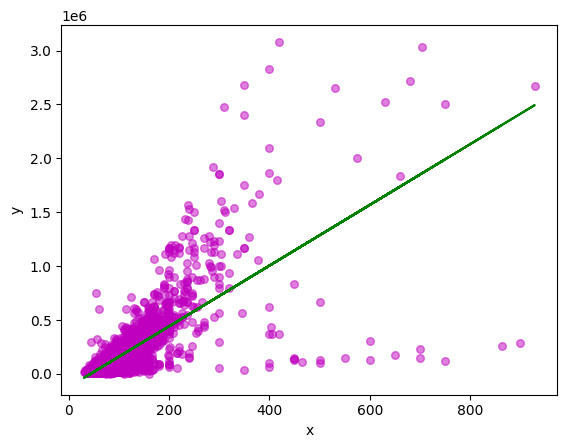

In [16]:
plt.scatter(x, y, color='m', marker='o', s=30, alpha=0.5)
y_pred = b_0 + b_1 * x  # пронозируемый вектор
plt.plot(x, y_pred, color='g')

plt.xlabel('x')
plt.ylabel('y')
plt.show()
